# MLOps con MLflow

#### Obtener datos

In [1]:
# load the dataset from pycaret
from pycaret.datasets import get_data
data = get_data('diamond')

#### Preprocesamiento

In [4]:
# initialize setup
from pycaret.regression import *
s = setup(data=data, target=data.columns[-1], html=False, verbose=False)

#### Entrenamiento de modelos

In [5]:
# compare all models
best = compare_models()

                                    Model           MAE           MSE  \
et                  Extra Trees Regressor  7.530251e+02  2.546164e+06   
rf                Random Forest Regressor  7.631321e+02  3.041737e+06   
lightgbm  Light Gradient Boosting Machine  7.583877e+02  3.147978e+06   
gbr           Gradient Boosting Regressor  9.119374e+02  3.349018e+06   
dt                Decision Tree Regressor  9.917265e+02  5.541154e+06   
ridge                    Ridge Regression  2.519999e+03  1.505313e+07   
lasso                    Lasso Regression  2.513035e+03  1.502905e+07   
br                         Bayesian Ridge  2.516420e+03  1.504336e+07   
llar         Lasso Least Angle Regression  2.518663e+03  1.549085e+07   
lr                      Linear Regression  2.613095e+03  1.572151e+07   
huber                     Huber Regressor  2.014123e+03  2.026179e+07   
par          Passive Aggressive Regressor  2.026920e+03  2.238617e+07   
omp           Orthogonal Matching Pursuit  2.905299

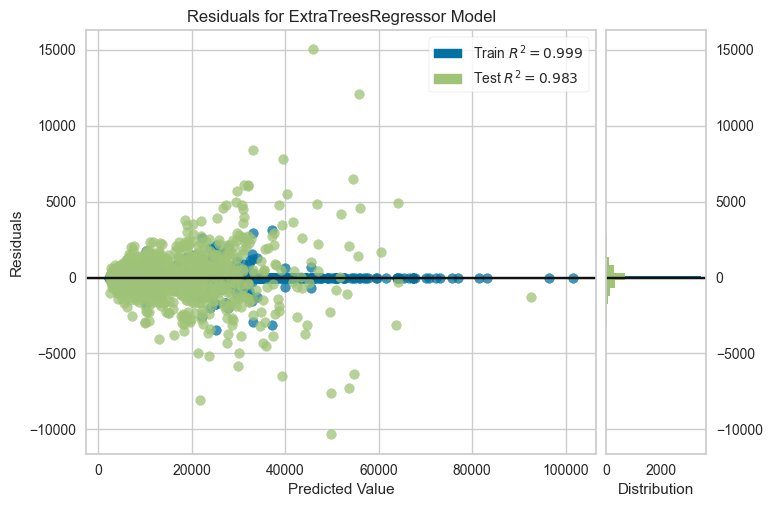

In [6]:
# check the residuals of trained model
plot_model(best, plot = 'residuals')

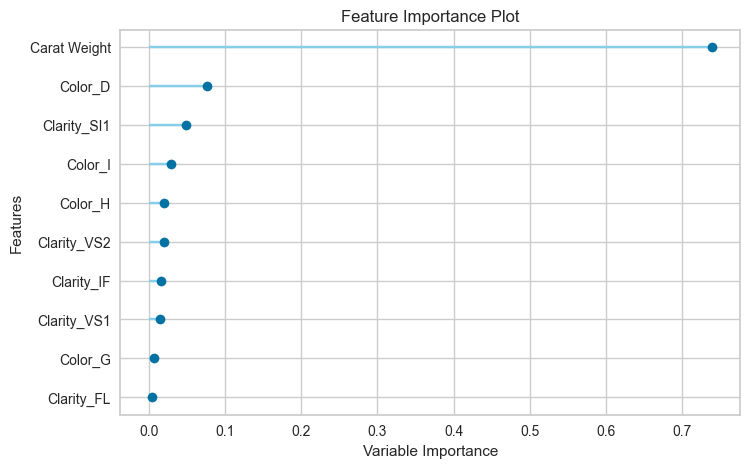

In [7]:
# check feature importance
plot_model(best, plot = 'feature')

In [8]:
# finalize the model
final_best = finalize_model(best)

# save model to disk
save_model(final_best, 'diamond-pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\SEBAST~1.ZAP\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Carat Weight'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                              'Polish', 'Symmetry', 'Report'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ord...
                 ('onehot_encoding',
                  TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                              'Polish', 'Symmetry'],
                                     transformer=OneHotEncoder(cols=['Cut',
                                                                     'Color',
                                                                     'Clarity',
                   

###  Gestión de modelos con MLFlow

In [12]:
# within notebook (notice ! sign infront)
!mlflow ui


In [11]:
#localhost:5000

### Consumir el modelo

In [10]:
import mlflow
logged_model = 'runs:/6b30a8280fa8459e94e922243ee7341c/model/'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Predict on a Pandas DataFrame.
import pandas as pd
loaded_model.predict(pd.DataFrame(data))

MlflowException: Run '6b30a8280fa8459e94e922243ee7341c' not found

In [ ]:
# print pipeline
print(loaded_model)

In [ ]:
pipeline = load_model('C:/Users/Leyre/Desktop/Curso Mondragon/Curso_ML con Pycaret/Entrega/5. MLOps/mlruns/1/23c33b7efc8341ee823759c7c41b2293/artifacts/model/model')

In [ ]:
# print pipeline
print(pipeline)

In [ ]:
data = get_data('diamond')

# create a copy of data and drop Price
data2 = data.copy()
data2.drop('Price', axis=1, inplace=True)

In [ ]:
# generate predictions
from pycaret.regression import predict_model
predictions = predict_model(pipeline, data=data2)
predictions.head()